# IMPORTS

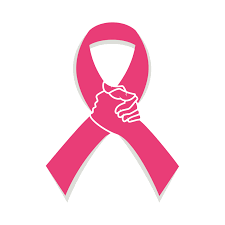


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load Dataset

In [ ]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df = df.drop('Unnamed: 32',axis=1)

In [ ]:
df.isnull().sum().sum()

In [ ]:
df['diagnosis'].unique()

In [ ]:
px.histogram(df, x="diagnosis") 

In [ ]:
plt.figure(figsize=(22,18))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,mask=matrix,cmap='viridis')

In [ ]:
df.columns

In [ ]:
df_mean = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_mean.corr(),annot=True,cmap='viridis')

In [ ]:
sns.pairplot(df_mean, hue='diagnosis')

In [ ]:
df_worst = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','diagnosis']]

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_worst.corr(),annot=True,cmap='viridis')

In [ ]:
sns.pairplot(df_worst,hue="diagnosis")

In [ ]:
df_se = df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','diagnosis']]

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_se.corr(),annot=True,cmap='viridis')

In [ ]:
sns.pairplot(df_se,hue="diagnosis")

# Train Test split

In [ ]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train ,y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [ ]:
def report(model):
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(model,x_test,y_test)

In [ ]:
report(log_model)

In [ ]:
log_model = LogisticRegression(solver='saga',max_iter=10000)

In [ ]:
penalty = ['elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0, 4, 10)

In [ ]:
param_grid = {'penalty':penalty,'C':C,'l1_ratio':l1_ratio}

In [ ]:
log_grid = GridSearchCV(log_model,param_grid)

In [ ]:
log_grid.fit(x_train,y_train)

In [ ]:
log_grid.best_params_

In [ ]:
report(log_grid)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
k_values = list(range(1,20))

In [ ]:
param_grid = {'n_neighbors':k_values}

In [ ]:
knn_grid = GridSearchCV(knn,param_grid,scoring='accuracy')

In [ ]:
knn_grid.fit(x_train,y_train)

In [ ]:
knn_grid.best_estimator_

## Performance metrics

In [ ]:
report(knn_grid)

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
param_grid = {'C':[0.05,0.01,0.1,1],'kernel':['linear','rbf','sigmoid'],'gamma':['scale','auto']}
svm_grid = GridSearchCV(svm,param_grid)

In [ ]:
svm_grid.fit(x_train,y_train)

In [ ]:
svm_grid.best_params_

In [ ]:
report(svm_grid)

# Descision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
param_grid = {'criterion':['gini','entropy'],"max_depth":[2,3,4,5,6]}

In [ ]:
dt_grid = GridSearchCV(dt,param_grid)

In [ ]:
dt_grid.fit(x_train,y_train)

In [ ]:
dt_grid.best_params_

In [ ]:
report(dt_grid)

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt_grid.best_estimator_,filled=True,feature_names=x.columns);

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_estimators=[256,512,1024]
max_features= [4,6,10,15,20,24]
bootstrap = [True]
oob_score = [True,False]

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [ ]:
rfc = RandomForestClassifier()
rf_grid = GridSearchCV(rfc,param_grid)

In [ ]:
rf_grid.fit(x_train,y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
report(rf_grid)

# ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
x.columns

In [ ]:
ada_model = AdaBoostClassifier()

In [ ]:
n_values = list(range(1,len(x.columns)))

In [ ]:
param_grid = {'n_estimators':n_values}

In [ ]:
ada_grid = GridSearchCV(ada_model,param_grid)

In [ ]:
ada_grid.fit(x_train,y_train)

In [ ]:
ada_grid.best_params_

In [ ]:
report(ada_grid)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {"n_estimators":[1000],'max_depth':[3,4,5]}

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
grid = GridSearchCV(gb_model,param_grid)


In [ ]:
grid.fit(x_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
report(grid)